In [56]:
import nltk
import pandas as pd
from nltk.corpus import stopwords

In [57]:
# nltk.download_shell()

### Get The Data

In [2]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


In [4]:
for mess_no, mess in enumerate(messages[:10]):
    print(mess_no,mess)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

### Get the Data in Dataframe

In [5]:
df = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','massage'])

In [6]:
df.head()

,label,massage
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df['length'] = df['massage'].apply(len)

In [8]:
df.head()

,label,massage,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### EDA

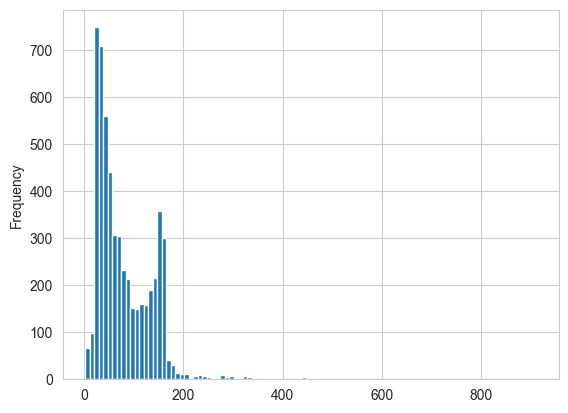

In [34]:
df['length'].plot(kind='hist',bins=100);

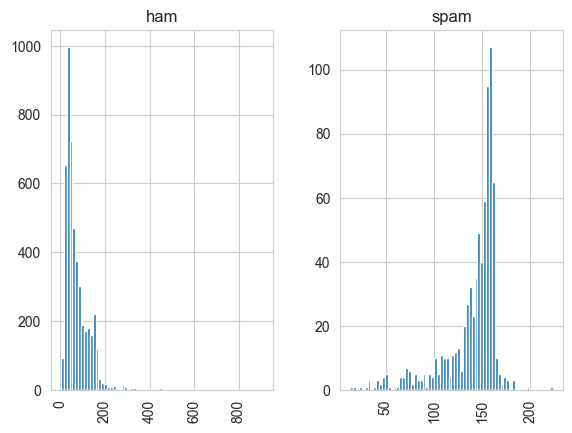

In [35]:
df.hist(column='length',by='label',bins=70);

In [36]:
df.groupby('label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

In [37]:
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

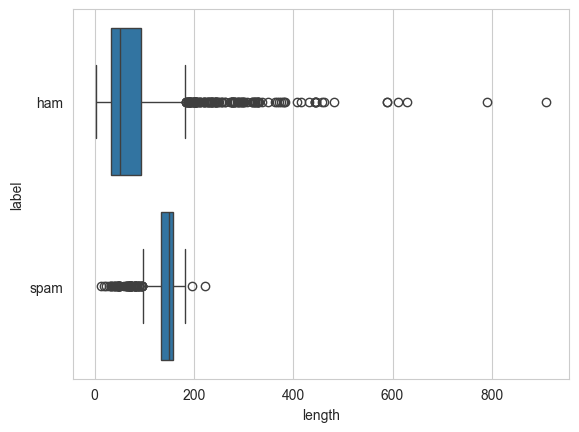

In [38]:
sns.boxplot(df, y='label',x='length');

## Text pre-Processing

In [45]:
import string

In [60]:
def text_processing(text):
    nonpunk = [c for c in text if c not in string.punctuation]
    nonpunk = ''.join(nonpunk)
    return [c for c in nonpunk.split() if c not in stopwords.words('english')]

In [61]:
text_processing(messages[3])

['ham', 'U', 'dun', 'say', 'early', 'hor', 'U', 'c', 'already', 'say']

In [63]:
df['massage'].head(5).apply(text_processing)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: massage, dtype: object

## Vectorization and Normalization

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [87]:
bow_transfer = CountVectorizer(analyzer='word')

In [88]:
x = bow_transfer.fit_transform(df['massage'])

In [89]:
features_names = bow_transfer.get_feature_names_out()

In [90]:
features_names.shape

(8713,)

In [91]:
print(features_names)

['00' '000' '000pes' ... 'èn' 'ú1' '〨ud']


In [92]:
print(x.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [93]:
x.toarray().shape

(5572, 8713)

In [94]:
bow_transfer = CountVectorizer(analyzer=text_processing).fit(df['massage'])

In [96]:
print(bow_transfer.get_feature_names_out())

['0' '008704050406' '0089my' ... '“Harry' '…' '…Thanks']


In [97]:
bow_transfer.get_feature_names_out().shape

(11617,)

In [99]:
mess4 = df['massage'][3]
print(mess4)

U dun say so early hor... U c already then say...


In [101]:
bow4 = bow_transfer.transform([mess4])
print(bow4)
print(bow4.shape)

  (0, 4221)	2
  (0, 4821)	1
  (0, 5453)	1
  (0, 6396)	1
  (0, 6414)	1
  (0, 7378)	1
  (0, 9746)	2
(1, 11617)


In [103]:
print(bow_transfer.get_feature_names_out()[4221])
print(bow_transfer.get_feature_names_out()[4821])

U
already


In [104]:
mess_bow = bow_transfer.transform(df['massage'])

In [105]:
print(mess_bow.shape)
print(mess_bow.nnz)

(5572, 11617)
56024


In [107]:
mess_bow.shape[1]

11617

In [109]:
sparcity = (100 * mess_bow.nnz/(mess_bow.shape[0] * mess_bow.shape[1]))
print('sparcity is -----', sparcity)

sparcity is ----- 0.08655038742205227


# TFIDF 

In [110]:
from sklearn.feature_extraction.text import TfidfTransformer

In [112]:
tfidf_transformer = TfidfTransformer().fit(mess_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9746)	0.5385626262927564
  (0, 7378)	0.4389365653379857
  (0, 6414)	0.3187216892949149
  (0, 6396)	0.29953799723697416
  (0, 5453)	0.29729957405868723
  (0, 4821)	0.26619801906087187
  (0, 4221)	0.40832589933384067


In [116]:
print(tfidf_transformer.idf_[bow_transfer.vocabulary_['say']])
print(tfidf_transformer.idf_[bow_transfer.vocabulary_['u']])

5.231239632897098
3.2800524267409408


In [117]:
messg_tfidf = tfidf_transformer.transform(mess_bow)
print(messg_tfidf.shape)

(5572, 11617)


## Training A Model

In [115]:
from sklearn.naive_bayes import MultinomialNB

In [118]:
spam_model = MultinomialNB().fit(messg_tfidf,df['label'])

In [119]:
spam_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [120]:
df['label'][3]

'ham'

In [121]:
all_predictions = spam_model.predict(messg_tfidf) 

In [122]:
from sklearn.metrics import confusion_matrix, classification_report

In [124]:
print(classification_report(df['label'],all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.84      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [126]:
print(confusion_matrix(df['label'],all_predictions))

[[4825    0]
 [ 116  631]]


## Using Train Test Split

In [129]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, lable_test = train_test_split(df['massage'],df['label'],test_size=0.2,random_state=101)
print(msg_train.shape,msg_test.shape)
print(label_train.shape,lable_test.shape)

(4457,) (1115,)
(4457,) (1115,)


## Creating a Pipline

In [131]:
from sklearn.pipeline import Pipeline

In [134]:
pipe_line = Pipeline([
                ('bow',CountVectorizer(analyzer=text_processing)),
                ('tfidf',TfidfTransformer()),
                ('classifier',MultinomialNB())
])

In [135]:
pipe_line.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x000002632B4134C0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [137]:
pred = pipe_line.predict(msg_test)

In [139]:
print(classification_report(lable_test,pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       980
        spam       1.00      0.66      0.79       135

    accuracy                           0.96      1115
   macro avg       0.98      0.83      0.89      1115
weighted avg       0.96      0.96      0.95      1115



In [140]:
confusion_matrix(lable_test,pred)

array([[980,   0],
       [ 46,  89]], dtype=int64)